## Fetch housing data

In [24]:
import pandas as pd
import numpy as np
import tarfile
import urllib.request
import os
import matplotlib.pyplot as plt

def load_housing_data():
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    
    ## Save the tar file 
    current_dir = os.getcwd()
    output_file = "\housing.tgz"
    output_path = current_dir + output_file
    urllib.request.urlretrieve(url, output_path)

    with tarfile.open(output_path) as housing_tar:
        housing_tar.extractall(path=current_dir)

    os.chdir(current_dir + "/housing/")
    data = pd.read_csv("housing.csv", header=0)
    return(data)
    
housing = load_housing_data()

## Describe data

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

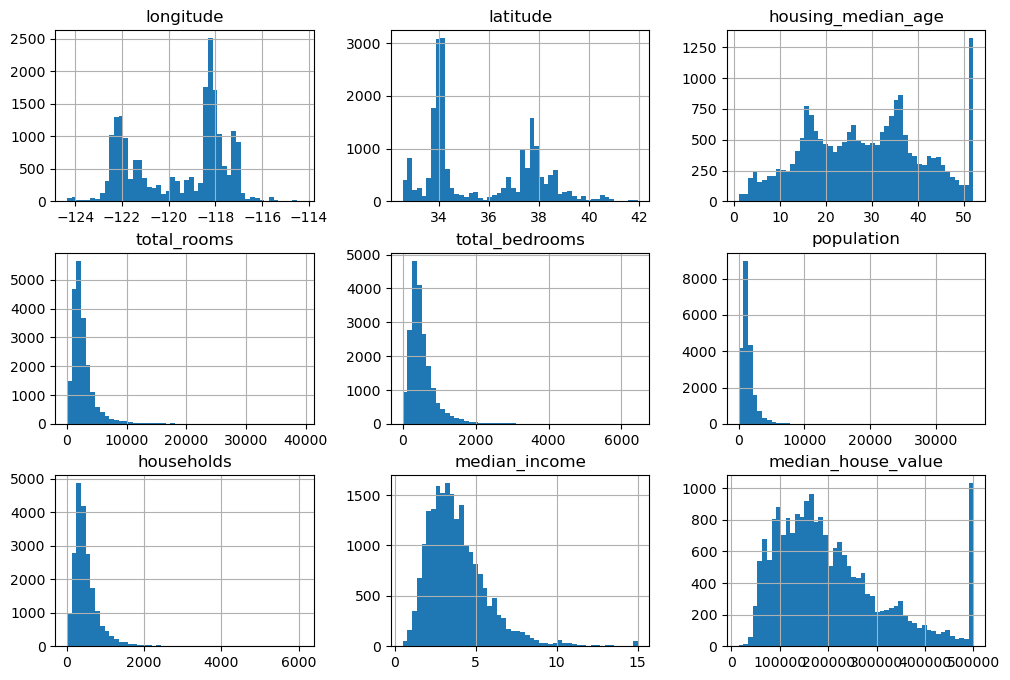

In [25]:
print(housing.head())
print(housing.info())
print(housing["ocean_proximity"].value_counts())
print(housing.describe())
housing.hist(bins=50, figsize=(12,8))
plt.show()

## Split data into train-test

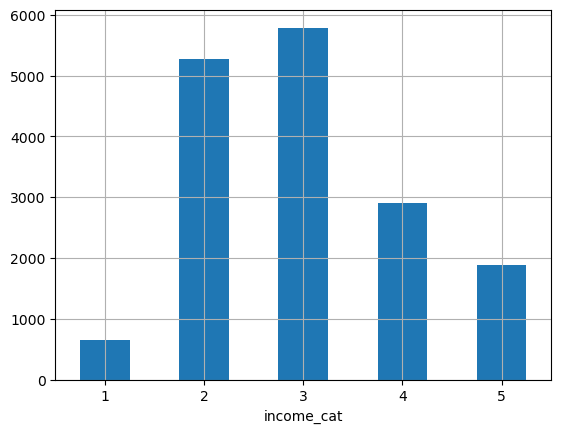

In [42]:
## Convert median income to income categories 1,2,3,4,5
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels = [1,2,3,4,5])

from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])
strat_train_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.show()

## Visualize data

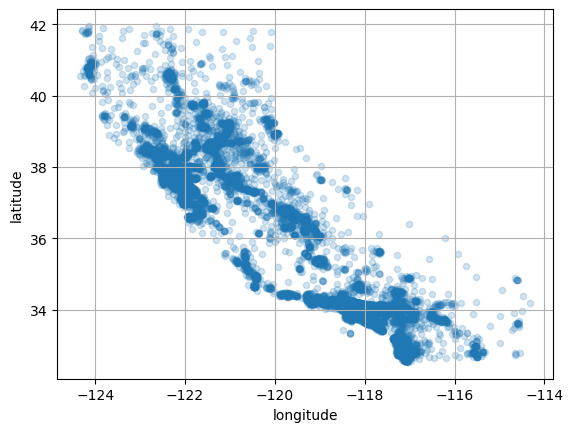

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

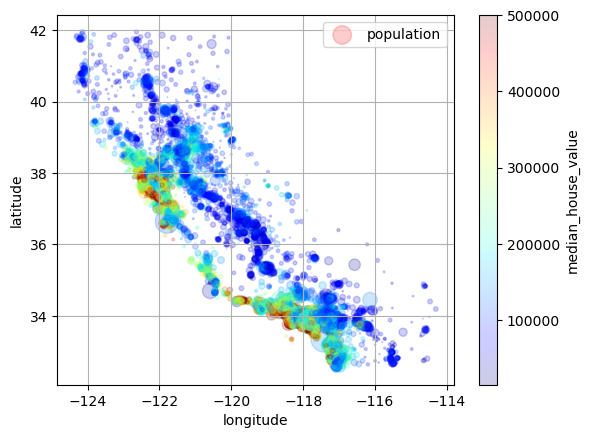

In [46]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, label="population", 
            c="median_house_value", cmap="jet", colorbar=True, legend=True, alpha=0.2)
plt.show()